In [1]:
import os
from tensorflow import keras

## Download data

In [2]:
DATA_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir = keras.utils.get_file(
    os.path.basename(DATA_URL),
    DATA_URL,
    cache_dir='./',
    cache_subdir='',
    extract=True
)
data_dir = os.path.splitext(data_dir)[0]

## Load data

In [4]:
INPUT_SIZE = 224
BATCH_SIZE = 32
DATA_DIR = data_dir

In [5]:
def preprocess_input(image):
    image /= 255
    return image

In [6]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_iter = data_generator.flow_from_directory(
    data_dir, 
    target_size=(INPUT_SIZE, INPUT_SIZE), 
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical'
)

Found 3670 images belonging to 5 classes.


In [7]:
num_classes = data_iter.num_classes
class_names = list(map(lambda p: p[0], sorted(data_iter.class_indices.items(), key=lambda p: p[1])))
print(f"num_classes = {num_classes}, class_names = {class_names}")

num_classes = 5, class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Show data

In [8]:
import utils

In [9]:
for x_batch, y_batch in data_iter:
    print(f"x_batch.shape = {x_batch.shape}")
    print(f"y_batch.shape = {y_batch.shape}")
    break

x_batch.shape = (32, 224, 224, 3)
y_batch.shape = (32, 5)


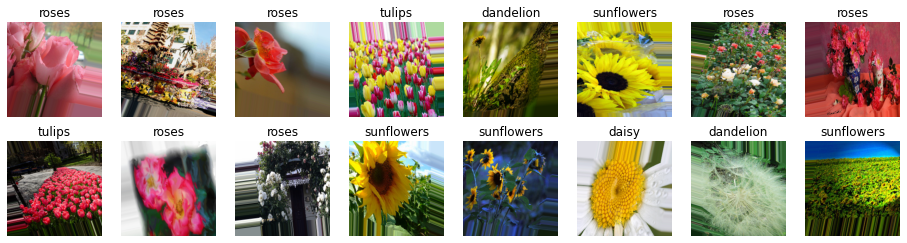

In [10]:
utils.plot_images(x_batch[:16], y_batch[:16], class_names=class_names)